<a href="https://colab.research.google.com/github/claire-middendorf/ERDC-2024/blob/main/bw2_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. SETUP

In [1]:
# install and import the neccessary packages
!pip install brightway2

import brightway2 as bw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bw2data as bd
import bw2io
import gdown
import zipfile
import os

#Create a new brightway project
bw.projects.set_current('bw2_demo')

# Import the biosphere3 database

bw.bw2setup()  # This will take a minute

# Import the Ecoinvent database # This will take longer than a minute, maybe 10 or 11

#alternate way
#!gdown 1HDRRwABVJbe9vKg6khtWsAKHi0uuf3Yx -O /content/ecoinvent_import.py
#!python3 /content/ecoinvent_import.py

direct_download_url = 'https://drive.google.com/uc?export=download&id=14l8JN-Rgvw2zPYw-5-OGeRSHKmy77rCn'
destination = '/content/ecoinvent_datasets.zip'

# Download the file
gdown.download(direct_download_url, destination, quiet=False)

# Unzip the downloaded file
with zipfile.ZipFile(destination, 'r') as zip_ref:
    zip_ref.extractall('/content/ecoinvent_datasets')

print("Ecoinvent datasets extracted to /content/ecoinvent_datasets")

# Importing the datasets into Brightway2
dataset_dir = '/content/ecoinvent_datasets'  # Directory containing unzipped datasets
ecoinvent_db_name = 'ecoinvent_3_9_1_colab'

# Check if the database has already been imported
if ecoinvent_db_name in bw.databases:
    ecoinvent_db = bw.Database(ecoinvent_db_name)
else:
    ei_importer = bw.SingleOutputEcospold2Importer(dataset_dir, ecoinvent_db_name)
    ei_importer.apply_strategies()
    ei_importer.statistics()

    # Drop unlinked activities and write the database
    ei_importer.drop_unlinked(True)
    ei_importer.write_database()
    ecoinvent_db = bw.Database(ecoinvent_db_name)

print(f"Database '{ecoinvent_db_name}' created with {len(ecoinvent_db)} activities.")




  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 11.8 MB/s e

Writing activities to SQLite3 database:


Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applying strategy: ensure_categories_are_tuples
Applied 3 strategies in 0.14 seconds


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 09/11/2024 13:39:50
  Finished: 09/11/2024 13:39:50
  Total time elapsed: 00:00:00
  CPU %: 95.10
  Memory %: 2.27
Created database: biosphere3
Creating default LCIA methods

Wrote 762 LCIA methods with 227223 characterization factors
Creating core data migrations



Downloading...
From (original): https://drive.google.com/uc?export=download&id=14l8JN-Rgvw2zPYw-5-OGeRSHKmy77rCn
From (redirected): https://drive.google.com/uc?export=download&id=14l8JN-Rgvw2zPYw-5-OGeRSHKmy77rCn&confirm=t&uuid=0b3a8167-5141-4b8b-9a83-ebd28683a992
To: /content/ecoinvent_datasets.zip
100%|██████████| 245M/245M [00:03<00:00, 61.6MB/s]


Ecoinvent datasets extracted to /content/ecoinvent_datasets
Extracting XML data from 21238 datasets
Extracted 21238 datasets in 246.21 seconds
Applying strategy: normalize_units
Applying strategy: update_ecoinvent_locations
Applying strategy: remove_zero_amount_coproducts
Applying strategy: remove_zero_amount_inputs_with_no_activity
Applying strategy: remove_unnamed_parameters
Applying strategy: es2_assign_only_product_with_amount_as_reference_product
Applying strategy: assign_single_product_as_activity
Applying strategy: create_composite_code
Applying strategy: drop_unspecified_subcategories
Applying strategy: fix_ecoinvent_flows_pre35
Applying strategy: drop_temporary_outdated_biosphere_flows
Applying strategy: link_biosphere_by_flow_uuid
Applying strategy: link_internal_technosphere_by_composite_code
Applying strategy: delete_exchanges_missing_activity
Applying strategy: delete_ghost_exchanges
Applying strategy: remove_uncertainty_from_negative_loss_exchanges
Applying strategy: fix_

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:01:00


Title: Writing activities to SQLite3 database:
  Started: 09/11/2024 13:45:26
  Finished: 09/11/2024 13:46:26
  Total time elapsed: 00:01:00
  CPU %: 98.70
  Memory %: 27.85
Created database: ecoinvent_3_9_1_colab
Database 'ecoinvent_3_9_1_colab' created with 21238 activities.


# II. Ecoinvent sample process and LCA

In [2]:
bw.databases

Databases dictionary with 2 object(s):
	biosphere3
	ecoinvent_3_9_1_colab

In [3]:
#searching for processes in ecoinvent

# take input process_name from user
name = input("Enter the name of the process: ")

#search ecoinvent
test_search = bw.Database('ecoinvent_3_9_1_colab').search(name)


# Display the test_search results and ask the user to select one from a numbered list

if len(test_search) == 0:  # If the activity is not found, print an error message and skip to the next row
  print(f"Error: {name} not found in ecoinvent database.")
elif len(test_search) >= 1:  # If multiple activities are found, ask the user to select one
            print(f"{len(test_search)} activities found for {name} in ecoinvent database. Please select an activity:")
            for j, result in enumerate(test_search):
                print(f"{j+1}. {result['name']} ({result['location']}), ({result['unit']})")
            choice = input("Enter the number of your choice: ")
            try:
                choice = int(choice)
                if choice < 1 or choice > len(test_search):
                    raise ValueError
            except:
                print("Invalid input. Using the first activity.")
                choice = 1
            activity = test_search[choice-1]
else:
  activity = test_search[0]  # Get the activity

print("\n","Selected Process:",activity)


Enter the name of the process: aluminum
25 activities found for aluminum in ecoinvent database. Please select an activity:
1. aluminium alloy production, AlLi (CA-QC), (kilogram)
2. aluminium alloy production, AlLi (CA-QC), (kilogram)
3. aluminium alloy production, AlLi (RoW), (kilogram)
4. aluminium alloy production, AlLi (RoW), (kilogram)
5. casting, aluminium, lost-wax (CA-QC), (kilogram)
6. casting, aluminium, lost-wax (RoW), (kilogram)
7. high voltage system production, for Li-ion battery (GLO), (kilogram)
8. market for anodising, aluminium sheet (GLO), (square meter)
9. aluminium sulfate production, powder (RoW), (kilogram)
10. aluminium sulfate production, powder (RER), (kilogram)
11. market for electricity, low voltage (CA-BC), (kilowatt hour)
12. market for electricity, low voltage (CA-NT), (kilowatt hour)
13. market for electricity, low voltage (CA-SK), (kilowatt hour)
14. market for electricity, low voltage (CA-NB), (kilowatt hour)
15. market for electricity, low voltage (CA

In [4]:
# select all TRACI methods
T_methods = [m for m in bw.methods if 'TRACI v2.1' in str(m) if not 'no LT' in str(m)]

In [5]:
# prompt: run LCA for above process

# Choose a functional unit
functional_unit = {activity: 1}  # Assuming you want to assess 1 unit of the first search result

# Create an LCA object and perform the calculation
lca = bw.LCA(functional_unit, T_methods[0])
lca.lci()


In [6]:
results = []
# Create an LCA object and conduct the calculation
for method in T_methods:
    lca.switch_method(method)
    lca.lcia()
    results.append((method[2].title(), lca.score,bw.methods[method]['unit']))

In [7]:
result_df = pd.DataFrame(results, columns = ['Environmental Impact Category', 'Score', 'Unit'])

display(result_df)

,Environmental Impact Category,Score,Unit
0,Acidification Potential (Ap),7.686856e-02,kg SO2-Eq
1,Global Warming Potential (Gwp100),8.359061e+00,kg CO2-Eq
2,Ecotoxicity: Freshwater,1.268648e+03,CTUe
3,Eutrophication Potential,6.120322e-02,kg N-Eq
4,Human Toxicity: Carcinogenic,3.697584e-06,CTUh
5,Human Toxicity: Non-Carcinogenic,1.480053e-05,CTUh
6,Ozone Depletion Potential (Odp),1.499996e-07,kg CFC-11-Eq
7,Particulate Matter Formation Potential (Pmfp),1.101177e-02,PM2.5-Eq
8,Maximum Incremental Reactivity (Mir),7.860906e-01,kg O3-Eq


# III. Creating a New Process

**Switch Grass Farming**

Switchgrass has been studied as a promising feedstock for 2nd generation biofuel. Once established, switchgrass can have a yield of 10 ton/hectare. The annual inputs include 75 kg N (in the form of urea), 21 kg of P (in the form of Thomas meal), 86 kg of K (in the form of potash salt), and 4 kg of 2,4 D for weed control. Farming and harvesting consume 77 liter of diesel per hectare consumed in agricultural machinery.

Data from HW 2

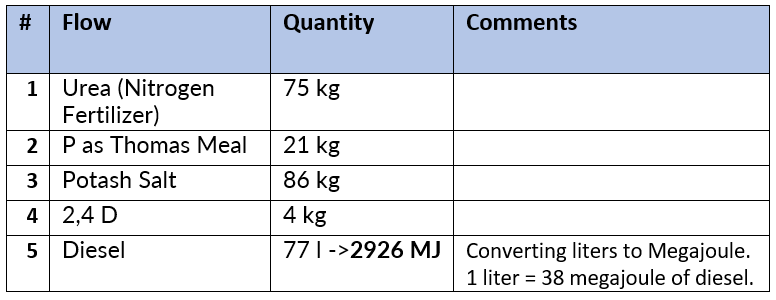

In [8]:
# Entering inventory data for process The inventory can also be imported as a CSV file
data = {
    "Flow Class": ["Product", "technosphere", "technosphere", "technosphere", "technosphere", "technosphere"],
    "Description": ["Switch Grass", "Urea", "Thomas meal", "Potash salt", "2,4-dichlorophenol", "Diesel"],
    "Amount": [10, 75, 21, 86, 4, 2926],
    "Unit": ["tons/ hectare", "kilogram", "kilogram", "kilogram", "kilogram", "megajoule"]
}

# Converting the inventory data into a dataframe
switchgrass_df=df = pd.DataFrame(data)
print(switchgrass_df)

     Flow Class         Description  Amount           Unit
0       Product        Switch Grass      10  tons/ hectare
1  technosphere                Urea      75       kilogram
2  technosphere         Thomas meal      21       kilogram
3  technosphere         Potash salt      86       kilogram
4  technosphere  2,4-dichlorophenol       4       kilogram
5  technosphere              Diesel    2926      megajoule


In [9]:
# Creating the inventory database - creating new database for user-defined processes is recommended
ec = bw.Database('energy_crop')

# Display all databases
bw.databases

# Define the product
product_name = switchgrass_df["Description"][0]  # Get the name of the product
product_qty = switchgrass_df["Amount"][0]   # Get the quantity of the product
product_unit = switchgrass_df["Unit"][0]  # Get the unit of the product

# Creating a process for the product and adding it to the process dict
process_dict = {('energy_crop', product_name): {
    'name': product_name,
    'unit': product_unit,
    'location':"GLO",
    'database': "energy_crop",
    'exchanges': [{
        'input': ('energy_crop', product_name),
        'amount': product_qty,
        'unit': product_unit,
        'type': 'production'
    }]
}}

# Creating an interative loop that searches for each of the reference flows, adding all technosphere (inputs) and biosphere flows to the process_dict
for i in range(1, len(switchgrass_df)): #Iter starts from 1 since first row is "Product"
    row = switchgrass_df.iloc[i]
    flow_class = row['Flow Class']  # Get the class of the flow (product, biosphere, or technosphere)
    name = row['Description']  # Get the name of the flow
    qty = row['Amount']  # Get the quantity of the flow
    unit = row['Unit']  # Get the unit of the flow

    # If the flow is from the technosphere, add it to the process dictionary as an input
    if flow_class == "technosphere":
        print(f"Processing technosphere flow: {name}")
        search_results = bw.Database('ecoinvent_3_9_1_colab').search(name)  # Search for the activity in the ecoinvent database
        if len(search_results) == 0:  # If the activity is not found, print an error message and skip to the next row
            print(f"Error: {name} not found in ecoinvent database.")
            continue
        elif len(search_results) >= 1:  # If multiple activities are found, ask the user to select one
            print(f"{len(search_results)} activities found for {name} in ecoinvent database. Please select an activity:")
            for j, result in enumerate(search_results):
                print(f"{j+1}. {result['name']} ({result['location']}), ({result['unit']})")
            choice = input("Enter the number of your choice: ")
            try:
                choice = int(choice)
                if choice < 1 or choice > len(search_results):
                    raise ValueError
            except:
                print("Invalid input. Using the first activity.")
                choice = 1
            activity = search_results[choice-1]
        else:
            activity = search_results[0]  # Get the activity

        # Add technosphere input to the process
        process_dict[('energy_crop', product_name)]['exchanges'].append({
            'input': (activity['database'], activity['code']),
            'amount': qty,
            'unit': unit,
            'type': 'technosphere'
        })
        print("\n")

    # If the flow is from the biosphere, add it to the process dictionary as an output
    elif flow_class == "biosphere":
        print("Processing biosphere flow...")
        search_results = bw.Database('biosphere3').search(name)  # Search for the activity in the biosphere database
        if len(search_results) == 0:  # If the activity is not found, print an error message and skip to the next row
            print(f"Error: {name} not found in biosphere database.")
            continue
        elif len(search_results) > 1:  # If multiple activities are found, prompt the user to select one
            print(f"Warning: {len(search_results)} activities found for {name} in biosphere database.")
            for j, activity in enumerate(search_results):
                print(f"{j+1}. {activity['name']} ({activity['database']})")
            selection = input("Please select an option (enter a number): ")
            activity = search_results[int(selection)-1]
        else:
            activity = search_results[0]  # Get the activity

        # Add biosphere flow to the process as an output
        process_dict[('my_database', product_name)]['exchanges'].append({
            'input': (activity['database'], activity['code']),
            'amount': -qty,
            'unit': unit,
            'type': 'biosphere'
        })

Processing technosphere flow: Urea
25 activities found for Urea in ecoinvent database. Please select an activity:
1. urea production (RNA), (kilogram)
2. urea production (CN), (kilogram)
3. urea production (RER), (kilogram)
4. urea production (RoW), (kilogram)
5. market for urea (RER), (kilogram)
6. market for urea (RNA), (kilogram)
7. market for urea (CN), (kilogram)
8. market for urea (RoW), (kilogram)
9. market for urea formaldehyde resin (RoW), (kilogram)
10. urea formaldehyde resin production (RER), (kilogram)
11. urea formaldehyde resin production (RoW), (kilogram)
12. market for [sulfonyl]urea-compound (GLO), (kilogram)
13. market for urea formaldehyde resin (RER), (kilogram)
14. urea ammonium nitrate production (CN), (kilogram)
15. urea ammonium nitrate production (RER), (kilogram)
16. urea ammonium nitrate production (RNA), (kilogram)
17. urea ammonium nitrate production (RoW), (kilogram)
18. [sulfonyl]urea-compound production (RoW), (kilogram)
19. [sulfonyl]urea-compound prod

In [10]:
# Write process details stored in process_dict to newly created database
ec.write(process_dict)

Writing activities to SQLite3 database:
0% [#] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 09/11/2024 14:03:13
  Finished: 09/11/2024 14:03:13
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 30.97


In [11]:
# Inspect activity to understand its structure
activity = list(ec)[0]  # Get the first activity
print("Activity details:")
print(f"Name: {activity['name']}")
print(f"Location: {activity['location']}")
print(f"Unit: {activity['unit']}")
print(f"Database: {activity['database']}")

# Check for exchanges associated with this activity
print("\nExchanges associated with this activity:")
for exc in activity.exchanges():
    print(f"  Input: {exc.input}")
    print(f"  Amount: {exc['amount']}")
    print(f"  Type: {exc['type']}")
    print(f"  Unit: {exc['unit']}")
    print("-" * 40)


Activity details:
Name: Switch Grass
Location: GLO
Unit: tons/ hectare
Database: energy_crop

Exchanges associated with this activity:
  Input: 'Switch Grass' (tons/ hectare, GLO, None)
  Amount: 10
  Type: production
  Unit: tons/ hectare
----------------------------------------
  Input: 'urea production' (kilogram, RoW, None)
  Amount: 75
  Type: technosphere
  Unit: kilogram
----------------------------------------
  Input: 'nutrient supply from thomas meal' (kilogram, GLO, None)
  Amount: 21
  Type: technosphere
  Unit: kilogram
----------------------------------------
  Input: 'potash salt production' (kilogram, RoW, None)
  Amount: 86
  Type: technosphere
  Unit: kilogram
----------------------------------------
  Input: '2,4-dichlorophenol production' (kilogram, RER, None)
  Amount: 4
  Type: technosphere
  Unit: kilogram
----------------------------------------
  Input: 'diesel, burned in agricultural machinery' (megajoule, GLO, None)
  Amount: 2926
  Type: technosphere
  Unit:

In [12]:
#select all TRACI methods
T_methods = [m for m in bw.methods if 'TRACI v2.1' in str(m) if not 'no LT' in str(m)]

In [13]:
# prompt: run LCA for above process

# Choose a functional unit
functional_unit = {('energy_crop', 'Switch Grass'): 1}

# Create an LCA object and perform the calculation
lca = bw.LCA(functional_unit, T_methods[0])
lca.lci()

In [14]:
results = []
# Create an LCA object and conduct the calculation
for method in T_methods:
    lca.switch_method(method)
    lca.lcia()
    results.append((method[2].title(), lca.score,bw.methods[method]['unit']))

In [15]:
result_df = pd.DataFrame(results, columns = ['Environmental Impact Category', 'Score', 'Unit'])

display(result_df)

,Environmental Impact Category,Score,Unit
0,Acidification Potential (Ap),0.331063,kg SO2-Eq
1,Global Warming Potential (Gwp100),53.630984,kg CO2-Eq
2,Ecotoxicity: Freshwater,831.413730,CTUe
3,Eutrophication Potential,0.115848,kg N-Eq
4,Human Toxicity: Carcinogenic,0.000005,CTUh
5,Human Toxicity: Non-Carcinogenic,0.000146,CTUh
6,Ozone Depletion Potential (Odp),0.000001,kg CFC-11-Eq
7,Particulate Matter Formation Potential (Pmfp),0.059874,PM2.5-Eq
8,Maximum Incremental Reactivity (Mir),8.331777,kg O3-Eq
